SMS Message, labeled as spam/ham

Build a classifier, split data into train/test and check accuracy

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
raw_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = raw_data.drop(columns = ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'])
df = df.rename(columns = {'v1': 'y', 'v2':'Text'})
df.head()

,y,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Vectorization of Text

In [5]:
inputs = df['Text']
labels = pd.get_dummies(df['y'])['ham']
#labels = df['y'].map({'ham':0, 'spam':1})

inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state = 157)

In [6]:
len(inputs_train), len(inputs_test)

(4179, 1393)

In [7]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [8]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
    
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos = get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorize = CountVectorizer(lowercase = True,tokenizer=LemmaTokenizer(),decode_error = 'ignore') 

In [19]:
Xtrain = vectorize.fit_transform(inputs_train)
Xtest = vectorize.transform(inputs_test)

Xtrain.shape,Xtest.shape

((4179, 7246), (1393, 7246))

In [20]:
#categorical count->  then choose multi-nomial distribuition
from sklearn.naive_bayes import MultinomialNB

<AxesSubplot:>

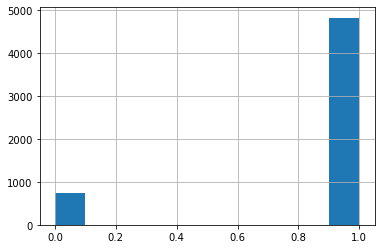

In [13]:
labels.hist() #inbalanced

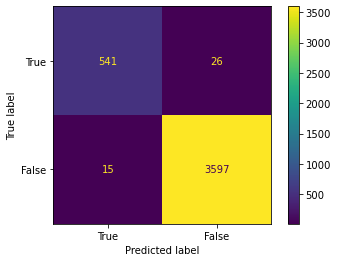

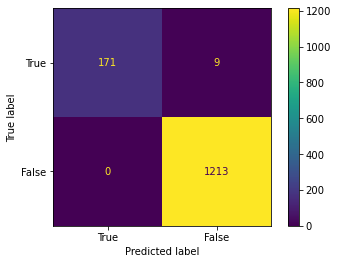

In [27]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
Ypred = model.predict(Xtest)
Ytrain_pred = model.predict(Xtrain)


cm_train = confusion_matrix(Ytrain, Ytrain_pred)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True, False])
cm_display_train.plot()

cm_test = confusion_matrix(Ytest, Ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True, False])
cm_display.plot()

In [24]:
from sklearn import metrics

print(metrics.f1_score(Ytrain, Ytrain_pred))
print(metrics.f1_score(Ytest,Ypred))

0.9943331029716654
0.9963039014373717


In [16]:
#check AUC
from sklearn.metrics import roc_auc_score

In [26]:
p_train = model.predict_proba(Xtrain)
p_test = model.predict_proba(Xtest) #N*2 matrix

print(roc_auc_score(Ytrain, p_train[:,1]))
print(roc_auc_score(Ytest, p_test[:,1]))

0.9888476780318789
0.9863149216817806


In [30]:
#visulize the data -> check most common words in each classes
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize(label):
    words = ''
    for msg in df[df['y'] == label]['Text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width = 600, height = 400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

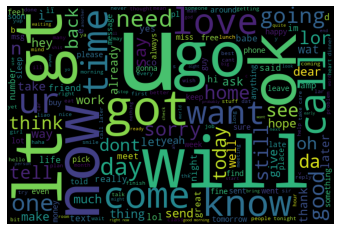

In [31]:
visualize('ham')

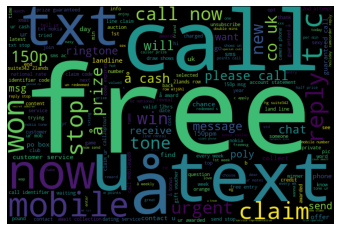

In [32]:
visualize('spam')

#### Check the model

In [33]:
#what we're getting wrong

X = vectorize.transform(df['Text'])
df['predictions'] = model.predict(X)

In [34]:
df.head()

,y,Text,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [35]:
#check the wrong prediction
sneaky_spam = df[(df['predictions'] == 1) & (df['y'] == 'spam')]['Text']

for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Filthy stories and GIRLS waiting for your
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 

In [37]:
#check the wrong prediction not spam
not_spam = df[(df['predictions'] == 0) & (df['y'] == 'ham')]['Text']

for msg in not_spam:
    print(msg)

Finally the match heading towards draw as your prediction.
Hey company elama po mudyadhu.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Total video converter free download type this in google search:)
U WILL SWITCH YOUR FONE ON DAMMIT!!
Networking technical support associate.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Received, understood n acted upon!
S.this will increase the chance of winning.
My mobile number.pls sms ur mail id.convey regards to achan,amma.Rakhesh.Qatar
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
\HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA ALETTER THATMUM GOTMARRIED 4thNOV.BEHIND OURBACKS åÐ FUCKINNICE!SELFISH
Dhoni have luck to win some big title.so we will win:)
